In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## Copying Images

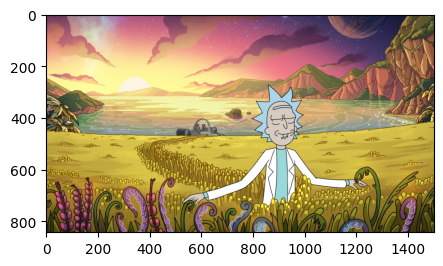

In [2]:
rick = np.array(Image.open('../../assets/rick.jpg'))
plt.figure(figsize=(5,5))
plt.imshow(rick)
plt.show()

We use the  `id`  function to find a variable's memory address; we see the objects in the memory space which the variables `A` and `rick` point to are the same.


In [3]:
A = rick
id(A) == id(rick)

True

However, if we apply method `copy()`, their memory addresses are different.

In [4]:
B = rick.copy()
id(B) == id(rick)

False

There may be unexpected behaviours when two variables point to the same object in memory. Consider the array `rick`. If we set all its entries to zero, all entires in `A` will become zero as well. However, as `rick` and `B` points to different objects, the values in `B` will not be affected. 

In [5]:
rick[:,:,] = 0

We can compare the variables <code></code> and array <code>A</code>:


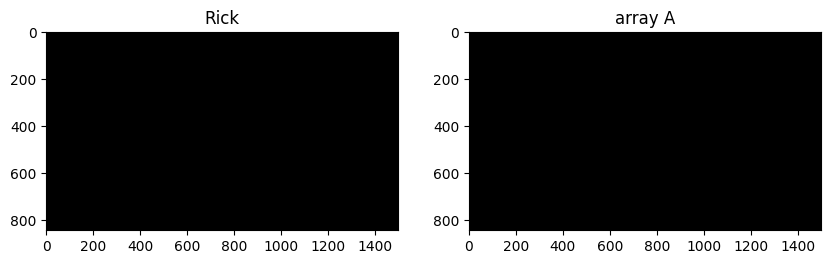

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(rick)
plt.title("Rick")
plt.subplot(122)
plt.imshow(A)
plt.title("array A")
plt.show()

We see they are the same. This behaviour is called aliasing. Aliasing happens whenever one variable's value is assigned to another variable. Variables are references to values on the memory. 

We can also compare <code>rick</code> and array <code>B</code>:


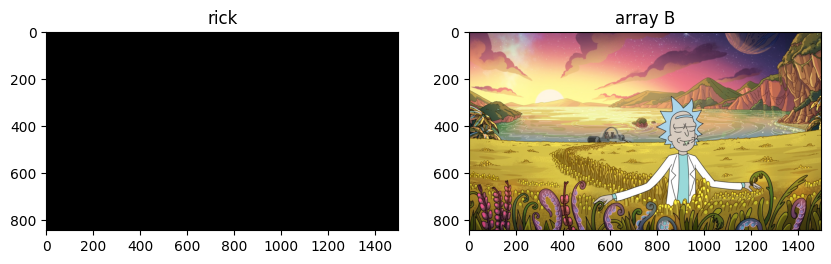

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(rick)
plt.title("rick")
plt.subplot(122)
plt.imshow(B)
plt.title("array B")
plt.show()


If a PIL function does not return a new image, the same principle applies. We will go over some examples later on. 

## Flipping Images 

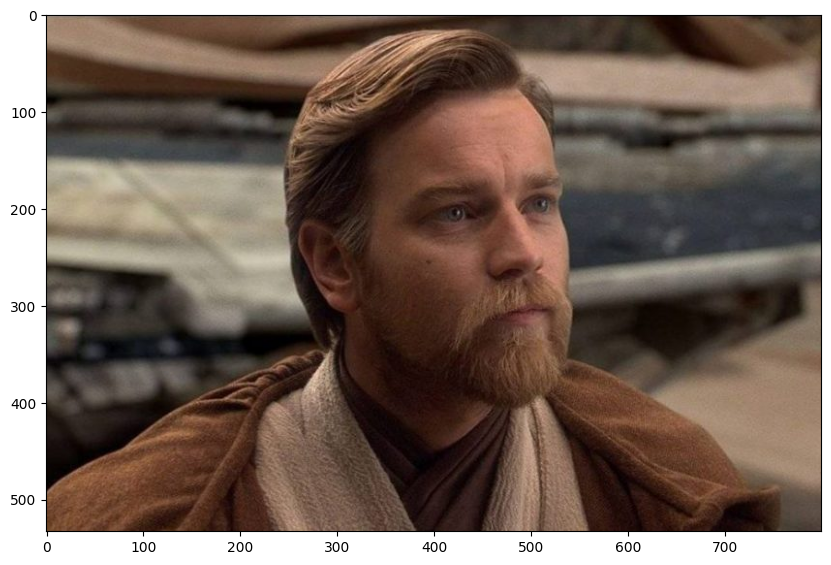

In [8]:
image = Image.open("../../assets/obiwan.jpg")
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

We can cast it to an array and find its shape:


In [9]:
array = np.array(image)
width, height, C = array.shape
print("width, height, C", width, height, C)

width, height, C 533 800 3


Let's flip, i.e rotate vertically, the image. Let's try the traditional approach. First, we create an array of the same size with datatype <code>np.uint8</code>.

In [10]:
array_flip = np.zeros((width, height, C), dtype=np.uint8)

Assign the first row of pixels of the original array to the new array’s last row and repeat the process for every row, incrementing the row number from the original array and decreasing the new array’s row index to assign the pixels accordingly. After excecuting the for loop below, `array_flip` will become the flipped image. 

In [11]:
for i, row in enumerate(array):
    array_flip[width - 1 - i, :, :] = row

<code>PIL</code> has several ways to flip an image, for example, we can use the <code>ImageOps</code> module:

In [12]:
from PIL import ImageOps

The `flip()` method of `ImageOps` module flips the image. The `mirror()` method will mirror  the image:

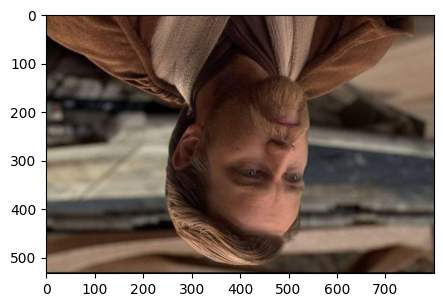

In [13]:
im_flip = ImageOps.flip(image)
plt.figure(figsize=(5,5))
plt.imshow(im_flip)
plt.show()

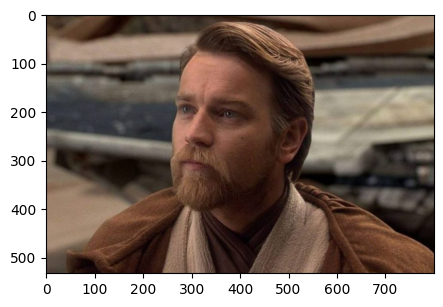

In [14]:
im_mirror = ImageOps.mirror(image)
plt.figure(figsize=(5,5))
plt.imshow(im_mirror)
plt.show()

We can use  the <code>transpose()</code> method; the parameter is an integer indicating what type of transposition we would like to perform. For example, we can flip the image using a value of `1`.


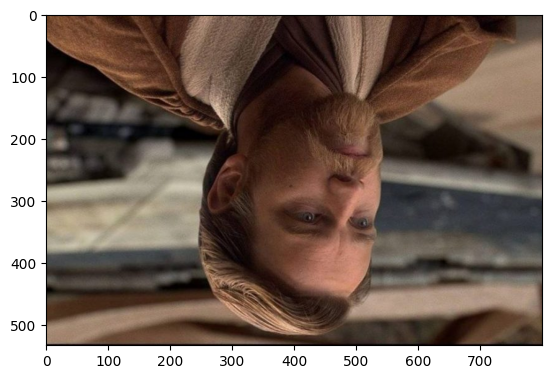

In [15]:
im_flip = image.transpose(1)
plt.imshow(im_flip)
plt.show()

In [16]:
flip = {"FLIP_LEFT_RIGHT": Image.FLIP_LEFT_RIGHT,
        "FLIP_TOP_BOTTOM": Image.FLIP_TOP_BOTTOM,
        "ROTATE_90": Image.ROTATE_90,
        "ROTATE_180": Image.ROTATE_180,
        "ROTATE_270": Image.ROTATE_270,
        "TRANSPOSE": Image.TRANSPOSE, 
        "TRANSVERSE": Image.TRANSVERSE}

In [17]:
flip["FLIP_LEFT_RIGHT"]

0

We can plot each of the outputs using the different  parameter values:

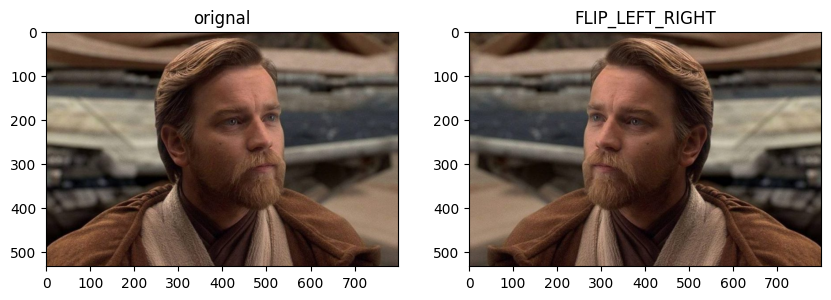

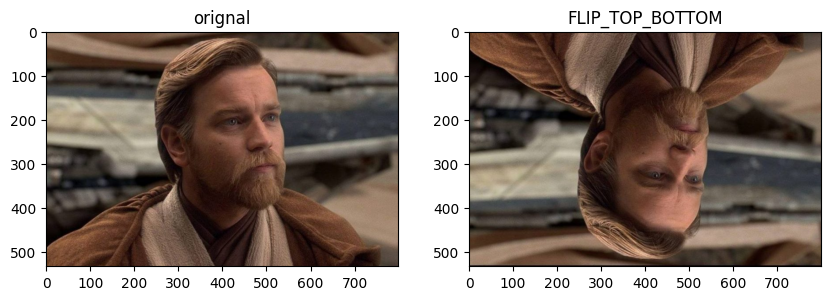

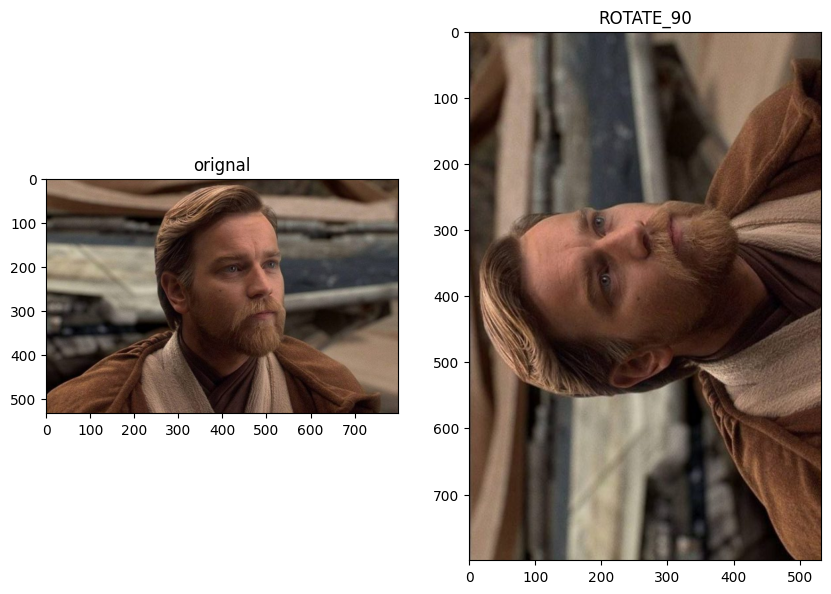

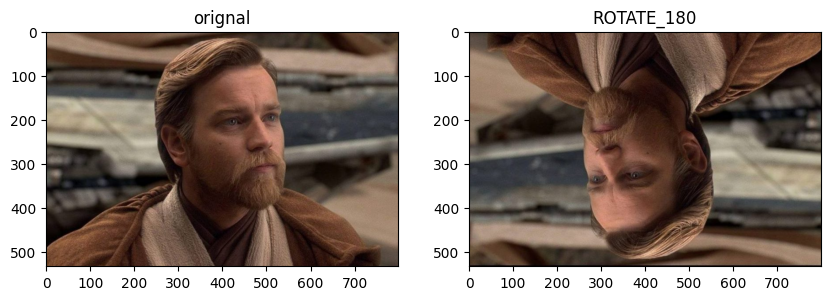

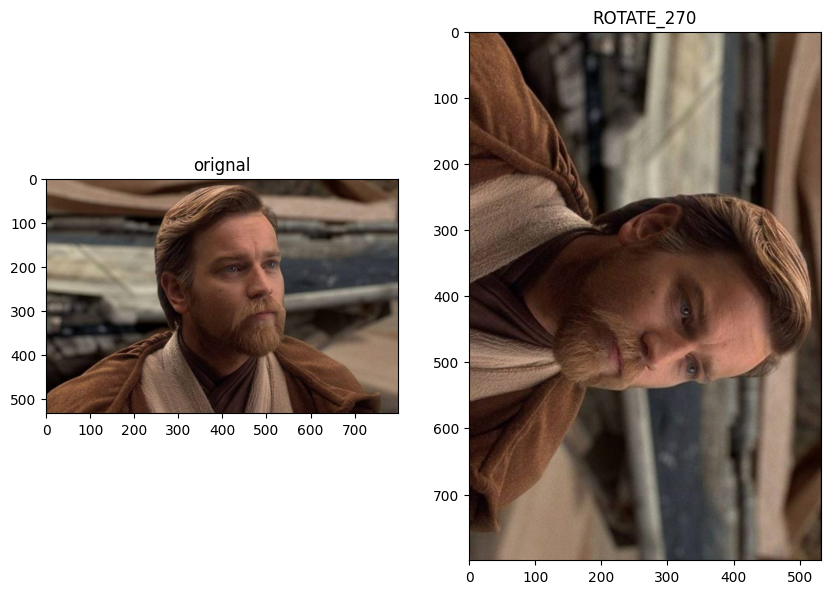

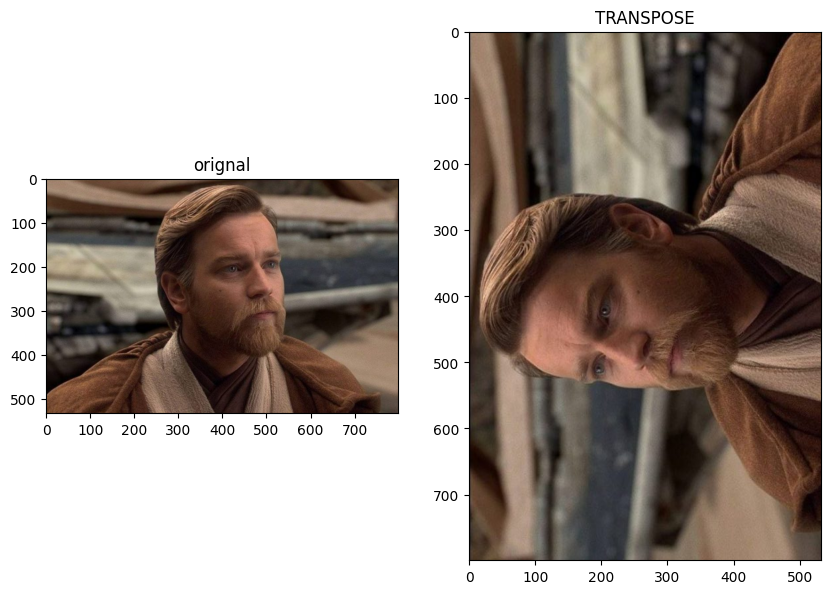

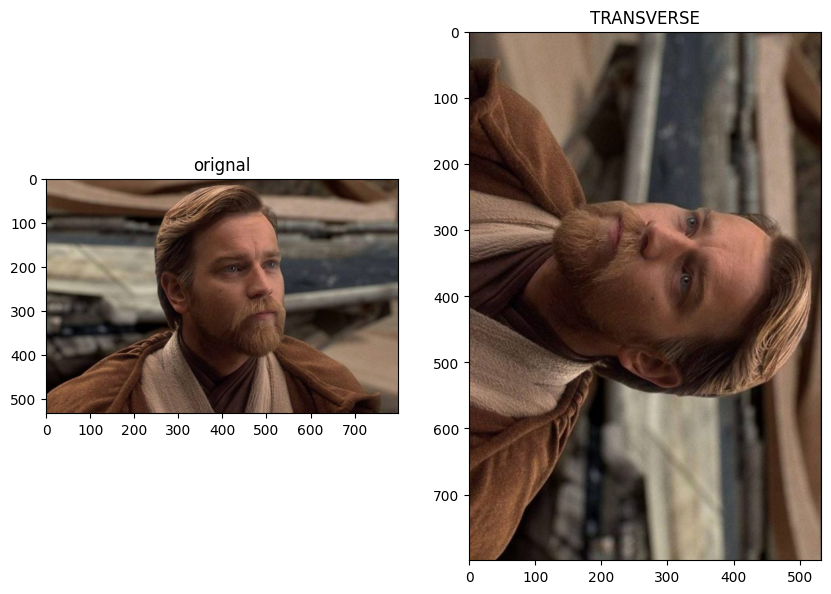

In [18]:
for key, values in flip.items():
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title("orignal")
    plt.subplot(1,2,2)
    plt.imshow(image.transpose(values))
    plt.title(key)
    plt.show()

 ## Cropping an Image


Cropping is the act of "cutting out" a part of an image and throwing out the rest. We can perform cropping using array slicing. 

Let start with a vertical crop: the variable `upper` is the index of the first row that we would like to include in the image, the variable `lower` is the index of the last row we would like to include. We then perform array slicing to obtain the new image. 


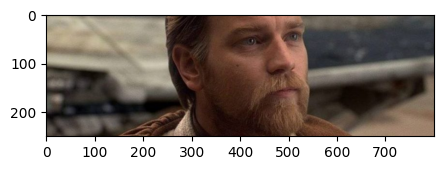

In [19]:
upper = 150
lower = 400
crop_top = array[upper: lower,:,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_top)
plt.show()

Consider the array `crop_top`: we can also crop horizontally. The variable `right` is the index of the first column that we would like to include in the image and the variable `left` is the index of the last column we would like to include in the image.


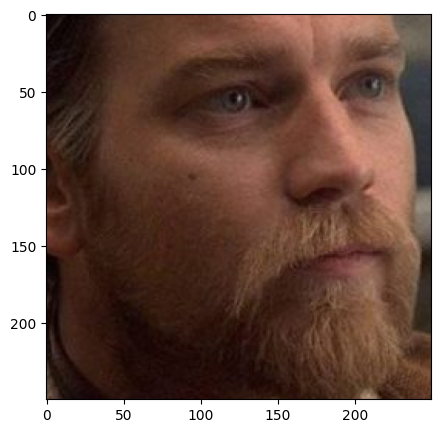

In [33]:
left = 300
right = 550
crop_horizontal = crop_top[: ,left:right,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_horizontal)
plt.show()

You can crop the PIL image using the <code>crop()</code> method, using the parameters from above Set the cropping area with <code>box=(left, upper, right, lower)</code>.


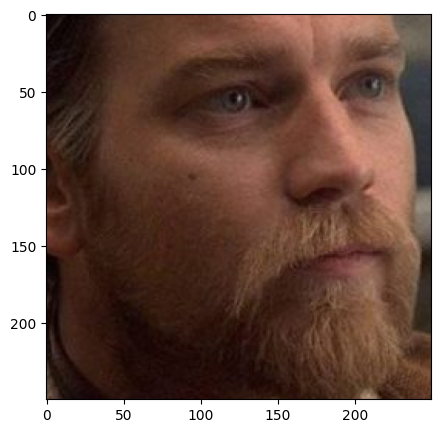

In [21]:
crop_image = image.crop((left,upper,right,lower))
plt.figure(figsize=(5,5))
plt.imshow(crop_image)
plt.show()

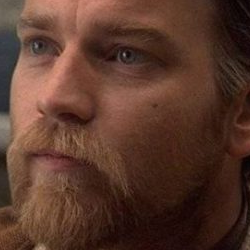

In [22]:
crop_image = crop_image.transpose(Image.FLIP_LEFT_RIGHT)
crop_image

## Changing Specific Image Pixels

We can change specific image pixels using  array indexing; for example, we can set  all the green and blue channels in the original image we cropped to zero:


In [23]:
array_sq = np.copy(array)
array_sq[upper:lower, left:right, 1:2] = 0

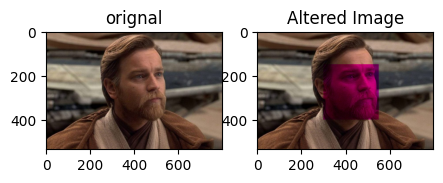

In [24]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(array)
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(array_sq)
plt.title("Altered Image")
plt.show()

We can also use the `ImageDraw` module from `PIL` library, which provides simple 2D graphics for Image objects 


In [25]:
from PIL import ImageDraw

In [26]:
image_draw = image.copy()

In [27]:
image_fn = ImageDraw.Draw(im=image_draw)

Whatever method we apply to the object <code>image_fn</code>, will change the image object <code>image_draw</code>.


We can draw a rectangle using the <code>rectangle</code> function, two important parameters include: <code>xy</code> – the coordinates bounding box  and <code>fill</code> – Color of the rectangle.


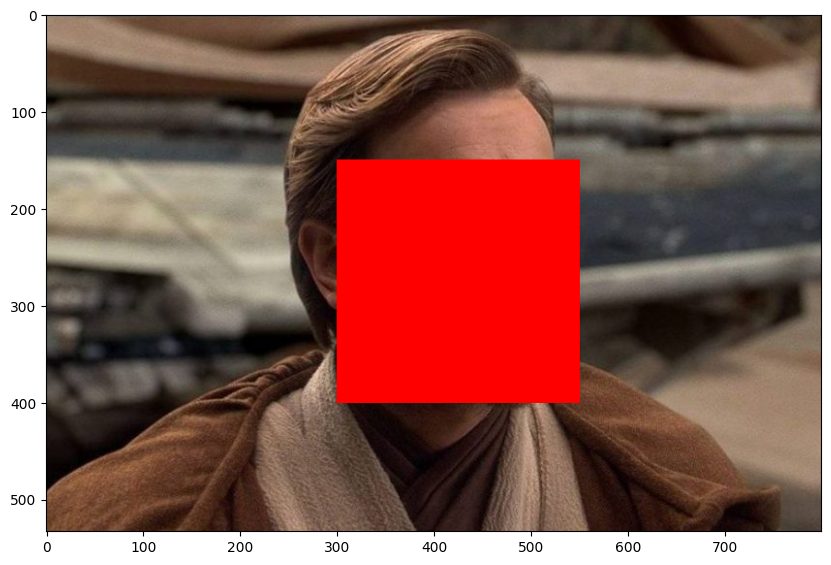

In [28]:
shape = [left, upper, right, lower] 
image_fn.rectangle(xy=shape,fill="red")
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()

We can overlay or paste one image over another by reassigning the pixel for one array to the next. Consider the following image array:


In [29]:
image_rick = Image.open("../../assets/rick.jpg")
array_rick = np.array(image_rick)

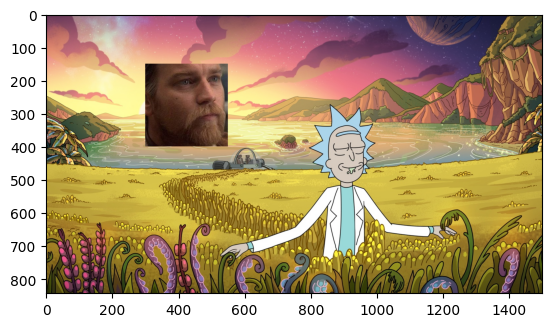

In [30]:
array_rick[upper:lower,left:right,:]=array[upper:lower,left:right,:]
plt.imshow(array_rick)
plt.show()

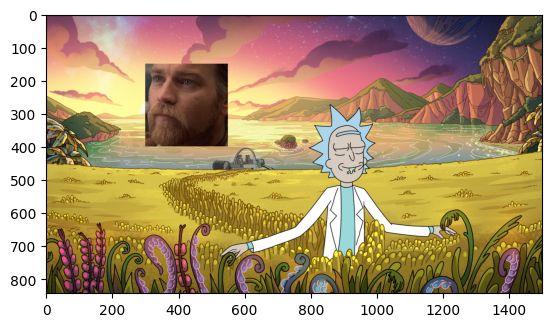

In [31]:
image_rick.paste(crop_image, box=(left,upper))
plt.imshow(image_rick)
plt.show()